In [3]:
import scipy
from Gesture import GestureSet

Gestures = scipy.io.loadmat('gesture_dataset.mat')
gestures = Gestures['gestures']
# print(gestures)
# # gesture_sets = [GestureSet(g) for g in gestures[0]]

In [13]:
test = [i for i in range(12)]
print(test)
print(test[2::3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[2, 5, 8, 11]


# Question 1

Looking at sequences of the same gesture type, there are observable variations in the way people perform gestures.
- **Extra body movement**: For example, in the zoom-in (two hands moving outward) gesture, some sequences show pure hand movement, while others include head or shoulder movement/rotation. 
- **Speed differences**: Some gestures move quickly while others are slower
- **Trajectory variation**: Hands move in slightly different paths for same gesture type, which can be observed in Point category.

If poses are not normalized, there will be below challenges:
- **Varied body size**: If participants have different body sizes, the raw positions of joints would be inconsistent.A model trained on one person's data might fail when tested on another person with different proportions.
- **Orientation**: If people face slightly different directions while performing gestures, their hand positions relative to the body would shift. These misaligned poses would not match correctly with gestures performed facing directly forward.


## Question 2

The chance performance will depend on the prior probability distribution of the labels in the training set. Given there are 9 gesture labels, and the gestures are uniformly distributed across these labels , the random guessing will have accuracy of **1/9**

## Question 3

The Nearest Neighbor (NN) algorithm relies on directly comparing sequences using a distance metric. In our case, L2 norm is used, which computes the rooted average of point-wise squared distance.
$$
d(A,B) = \sqrt{\sum_{i=1}^{N}(A_i - B_i)^2}
$$

If A has 20 frames and another has 10, you can't directly compute the difference.

## Question4

**Pros**
- There is no training required, we only store training data and compute L2 distances. This method will work well with small dataset, without requiring huge amounts of training data.
- This is non-parametric method. Unlike the models such as Neural Nets that require parametric assumption on data distributions. Nearest neighbor can handle complex, non-linear gesture patterns.

**Cons**
- It is computationally expensive. As each inference will required O(N) to compare with all training data.
- It requires fixed-length sequence. Unlike neural networks like RNN can allow flexible length, NN due to pointwise L2 distance metric, requiring resampling when preprocssing the data.
- It is sensitive to outliers. If the gesture sequences have many unnecessary motion, it will heavily influence NN's performance. 

# Question 5

Accuracy at ```num_frames = 20``` and ```ratio = 0.4``` is **0.75926**

The code and visualization of parameter grid search is attached below. The best parameter tried sofar is ```num_frames = 25``` and ```ratio = 0.4``` which yields an accuracy of **0.8519**



Tested num_frames=10, ratio=0.3, Accuracy=0.6561
Tested num_frames=10, ratio=0.4, Accuracy=0.7099
Tested num_frames=10, ratio=0.5, Accuracy=0.7259
Tested num_frames=10, ratio=0.6, Accuracy=0.7407
Tested num_frames=10, ratio=0.7, Accuracy=0.7901
Tested num_frames=15, ratio=0.3, Accuracy=0.6243
Tested num_frames=15, ratio=0.4, Accuracy=0.7531
Tested num_frames=15, ratio=0.5, Accuracy=0.6593
Tested num_frames=15, ratio=0.6, Accuracy=0.7500
Tested num_frames=15, ratio=0.7, Accuracy=0.7407
Tested num_frames=20, ratio=0.3, Accuracy=0.7249
Tested num_frames=20, ratio=0.4, Accuracy=0.7593
Tested num_frames=20, ratio=0.5, Accuracy=0.7778
Tested num_frames=20, ratio=0.6, Accuracy=0.7315
Tested num_frames=20, ratio=0.7, Accuracy=0.7901
Tested num_frames=25, ratio=0.3, Accuracy=0.6931
Tested num_frames=25, ratio=0.4, Accuracy=0.7037
Tested num_frames=25, ratio=0.5, Accuracy=0.7852
Tested num_frames=25, ratio=0.6, Accuracy=0.7315
Tested num_frames=25, ratio=0.7, Accuracy=0.8519
Tested num_frames=30

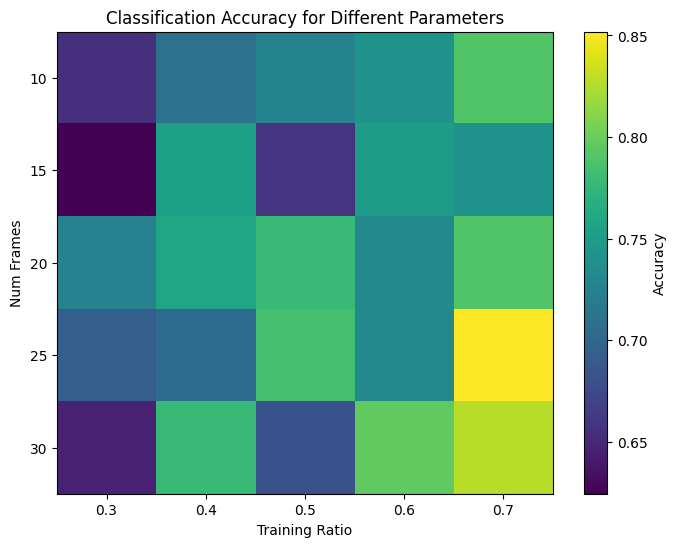

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from test_classify_nn import test_classify_nn
frame_options=[10,15, 20, 25,30]
ratio_options=[0.3, 0.4, 0.5, 0.6,0.7]

accuracy_results = np.zeros((len(frame_options), len(ratio_options)))

# Run tests for each combination of num_frames and ratio
for i, num_frames in enumerate(frame_options):
    for j, ratio in enumerate(ratio_options):
        accuracy = test_classify_nn(num_frames, ratio)
        accuracy_results[i, j] = accuracy
        print(f"Tested num_frames={num_frames}, ratio={ratio}, Accuracy={accuracy:.4f}")

# Visualize the results using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(accuracy_results, cmap="viridis", aspect="auto", interpolation="nearest")
plt.colorbar(label="Accuracy")
plt.xticks(ticks=np.arange(len(ratio_options)), labels=[f"{r}" for r in ratio_options])
plt.yticks(ticks=np.arange(len(frame_options)), labels=[f"{f}" for f in frame_options])
plt.xlabel("Training Ratio")
plt.ylabel("Num Frames")
plt.title("Classification Accuracy for Different Parameters")
plt.show()

